In [3]:
import os
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

了解业务：
1. 业务领域：什么是重要指标？如受访者幸福感，总收入, 总支出等
2. 特征工程：家庭要不要模仿财务定义资产负债表、利润表以及现金流量表？
3. 特征工程：家庭要不要模仿公司定义
              [# 财务质量类
              '净利率','净利率TTM','财务费用比例','营业利润率','资产回报率TTM','毛利率','股权乘数','有息负债率',
              # 运营能力
              '营业收入总资产比','营业利润总资产比',
              # 杠杆因子
              '资产负债率','长期负债比率',
              # 流动性因子
              '流动比率']

# 读取数据

In [4]:

# 中国家庭数据
f=r'hh2017_20191120_所有_version14.dta'
df_hh = pd.read_stata(f)
print('成功读取家庭部分的数据，例如:资产与负债，家庭的支出与收入，金融知识、基层治理与主观评价等共{} '.format(df_hh.shape))
df_hh.head()

成功读取家庭部分的数据，例如:资产与负债，家庭的支出与收入，金融知识、基层治理与主观评价等共(40011, 2457) 


,hhcid_2017,hhid,hhid_2011,hhid_2013,hhid_2015,hhid_2017,track,j1001,a1100,a1101,...,h3105,h3106,h3107,h3111,h3102_1_mc,h3102_2_mc,h3102_3_mc,h3102_4_mc,h3102_7777_mc,h3102_7788_mc
0,com2017000668,2017000001,,,,2017000001,0.0,6.0,NaN,NaN,...,NaN,NaN,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
1,com2017000046,2013013417,,2013013417,2015018254,2017000002,1.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0
2,com2017000193,2017000003,,,,2017000003,0.0,1.0,NaN,NaN,...,NaN,NaN,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
3,com2017000575,2013012670,,2013012670,2015016869,2017000004,1.0,6.0,1.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0
4,com2017000767,2013020230,,2013020230,2015027944,2017000005,1.0,6.0,1.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0


In [5]:
df = df_hh.copy()

In [6]:
dtypes = []
for col in df_hh.columns:
    dtypes.append(df_hh[col].dtype)
print(dtypes)

[dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float32'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('int16'), dtype('float64'), dtype('float64'), dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'),

In [39]:
numerical_features=['b2000e','b2002','b2003a','b2003d','b2003b','b2003e','b2004a','b2046','b2050','b2051','b2052','b2055','b2059','b2063',
               'b2080','b2093','b2099','b2100','b2101','b2102','b2103','b2104','b2105','b2110','agridebt','b3004_2','b3004b_2_imp',
                'b3005_2_imp','b3005b_2','b3006_2','b3006a_2_imp','b3006b_2','b3008a_2','b3008c_2','b3008fit_2','b3030a_2','b3030d_2_imp',
                'b3030e_2_imp','b3031a_2_imp','b3045c_2_imp','b3046_2','b3046a_2','b3046b_2','b3048_2','b3056a_2_imp','b3058_2','b3059a_2',
                'c1000bb','c1000bd','c1002b','c1004','c1011','c1014','c1015a','c1015b','c2002','c2000f_1_imp','c2000f_2_imp','c2000f_3_imp',
                'c2005_1','c2005_2','c2005_3','c2005_4','c2005_5','c2005_6','c2011e_1_imp','c2011e_2_imp','c2011e_3_imp','c2011e_4_imp',
                'c2011e_5_imp','c2011e_6_imp','c2012_1','c2012_2','c2012_3','c2012_4','c2012_5','c2012_6','c2013_1_imp','c2013_2_imp',
                'c2013_3_imp','c2013_4_imp','c2013_5_imp','c2013_6_imp','c2016_1_imp','c2016_2_imp','c2016_3_imp','c2016_4_imp','c2016_5_imp',
                'c2016_6_imp','c2028_1','c2028_2','c2028_3','c2028_4','c2028_5','c2028_6','c2027d_1_adj','c2027d_2_adj','c2027d_3_adj',
                'c2027d_4_adj','c2027d_5_adj','c2027d_6_adj','c2032_1_imp','c2032_2_imp','c2032_3_imp','c2032_4_imp','c2032_5_imp','c2032_6_imp',
                'c2035a_1_imp','c2035a_2_imp','c2035a_3_imp','c2035a_4_imp','c2035a_5_imp','c2035a_6_imp','c2044_1','c2044_2','c2044_3','c2044_4',
                'c2044_5','c2044_6','c2045_1','c2045_2','c2045_3','c2045_4','c2045_5','c2045_6','c2059_1','c2059_2','c2059_3','c2059_4','c2059_5',
                'c2059_6','c2064_1_imp','c2064_2_imp','c2064_3_imp','c2064_4_imp','c2064_5_imp','c2064_6_imp','c3002_1_imp','c3002_2_imp',
                'c3002_3_imp','c3002_4_imp','c3002_5_imp','c3002_6_imp','c3002a_1_imp','c3002a_2_imp','c3002a_3_imp','c3002a_4_imp','c3002a_5_imp',
                'c3002a_6_imp','c3004aa_1','c3004aa_2','c3004aa_3','c3004aa_4','c3004aa_5','c3004aa_6','c3006_1','c3006_2','c3006_3','c3006_4',
                'c3006_5','c3006_6','c3009_1','c3009_2','c3009_3','c3009_4','c3009_5','c3009_6','c2001ba','c2003_1','c2003_2','c2003_3','c2003_4',
                'c2003_5','c2003_6','c2004_1','c2004_2','c2004_3','c2004_4','c2004_5','c2004_6','c2023a','c2023c','c2023d','c2023e','c2002d','c2002e',
                'c3017ca','c3019','c3019a','c3019e','c3019c','c3024','c3025','c4007','c4007a','c4008','c4008b','c7002','c7052b','c7002a','c7060',
                'c7007a_1','c7007a_2', 'c7008_1_imp','c7008a_1_imp','c7008b_1_imp','c7008b_2_imp','c7009a_1_imp','c7009a_2_imp','c7026_1','c7026_2',
                'c7002b','c7059','c7058','c7061','c7062','c7072','c7072b','c7074','c8002','c8001c','c8002a','c8005','c8005a','c8007','d1105','d2104',
                'd2110a','d3103','d3104a','d3109','d3110','d3116','d3116b','d3117','d5103a','d5107','d5108','d5109','d7106h','d7106j','d7106h',
                'd7110a','d7112','d4111','d6100a','d6116','d8104','d8106','d9103','d9105','d9110a','d9110b','d9108','k1101','k2102c','k2124','k2208','total_consump']

In [40]:
##全表cols的特征分类
cols = (sorted(list(df_hh.columns)))
binary_features = [c for c in df_hh.columns if df_hh[c].nunique() == 2]
drop_rest_columns = [col for col in cols if df_hh[col].dtype != 'O']
drop_rest_columns = [col for col in drop_rest_columns if df_hh[col].dtype != 'object']
categorical_features = [col for col in drop_rest_columns
                        if (col not in numerical_features) & (col not in binary_features)]

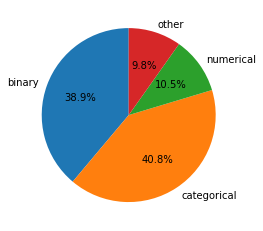

In [41]:
##可视化特征的类型
binary = len(binary_features)
category = len(categorical_features)
numerical = len(numerical_features)
total = len(df_hh.columns)
others = total - numerical - category - binary
labels = ['binary','categorical','numerical','other']
sizes = [binary/total, category/total, numerical/total, others/total]
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle = 90)
plt.show()

In [42]:
##小于500个有效值的特征占所有特征的比例
def NotNullRatio(columns):
    NotNullL = []
    NullL = []
    for col in columns:
        notnullNum = len(df[col][df[col].notnull()])
        totalNum = len(df[col])
        ratio = notnullNum/totalNum
        if ratio < 0.01:
            NotNullL.append(col)
        else:
            NullL.append(col)
    return (len(NotNullL),len(NullL))

In [43]:
NotNullRatio(numerical_features)

(112, 147)

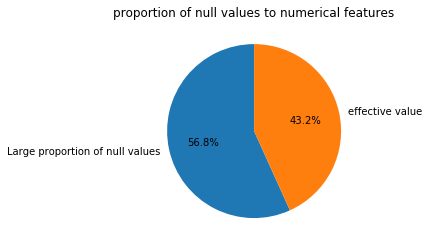

In [44]:
##小于500个有效值的数值特征占所有数值特征的比例的可视化
labels = ['Large proportion of null values','effective value']
sizes = [NotNullRatio(numerical_features)[1],NotNullRatio(numerical_features)[0]]
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle = 90)
plt.title('proportion of null values to numerical features')
plt.show()

In [45]:
NotNullRatio(df.columns)

(867, 1591)

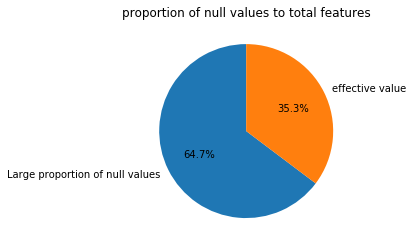

In [46]:
##小于500个有效值的特征占所有特征的比例的可视化
labels = ['Large proportion of null values','effective value']
sizes = [NotNullRatio(df.columns)[1],NotNullRatio(df.columns)[0]]
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle = 90)
plt.title('proportion of null values to total features')
plt.show()

In [47]:
print(binary,category,
numerical,
total)

955 1002 259 2457


In [48]:
##探索数据
df['b3048_2'][df['b3048_2'].notnull()]

28        1.000
145       1.000
279       0.400
296       8.000
1233     18.000
1312     14.000
1510      1.000
1878      5.000
2206      1.500
2243      3.000
2295      0.130
2491      0.100
3063      6.000
3126      7.000
3676      1.000
4081      1.500
4248     20.000
4636      1.200
4781     24.000
5559      6.500
5652      0.100
6057      7.000
6323      2.000
6341      1.500
6501      0.600
6508      1.500
8084      1.000
8139      5.000
8187      1.000
8613      2.000
          ...  
33020     2.000
33030    15.000
33036     5.000
33392    15.000
33816     0.150
33828     1.000
33846     2.000
34253     4.000
34431    10.000
36003     1.000
36190     1.000
36205    10.000
36298     0.060
36427     3.000
36673     1.000
36793     8.000
36803     1.000
37197     0.010
37214     7.000
37359     0.040
37437     1.000
37974     0.625
38247     1.000
38319     1.300
38330     5.000
39192     6.000
39591     1.200
39593     4.000
39723     1.000
39917     2.500
Name: b3048_2, Length: 1

In [17]:
df['c2032_2_imp_dummy'][df['c2032_2_imp_dummy'].notnull()].value_counts()

0.0    1096
1.0      15
Name: c2032_2_imp_dummy, dtype: int64

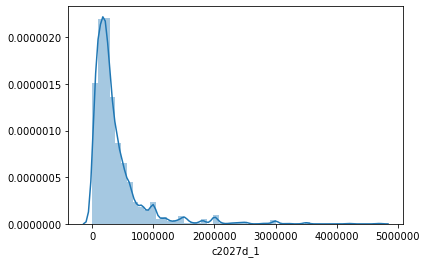

In [18]:
col = 'c2027d_1'
sns.distplot(df[col][df[col].notnull()])

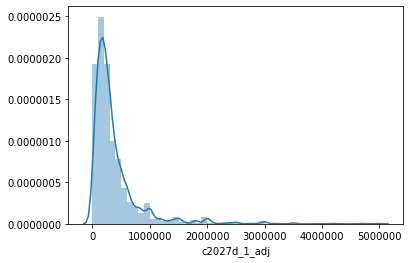

In [19]:
col = 'c2027d_1_adj'
sns.distplot(df[col][df[col].notnull()])

In [20]:
##/针对六套房取最近的一年
def getLateYear(col1,col2,col3=False,col4=False,col5=False,col6=False):
    lateYear = []
    for i in range(len(col1)):
        col1 = col1.fillna(0)
        col2 = col2.fillna(0)
        col3 = col3.fillna(0)
        col4 = col4.fillna(0)
        col5 = col5.fillna(0)
        col6 = col6.fillna(0)
        colList = []    
        colList.append(col1[i])
        colList.append(col2[i])
        colList.append(col3[i])
        colList.append(col4[i])
        colList.append(col5[i])
        colList.append(col6[i])
        colSeries = pd.Series(colList)
        Year = colSeries.max()
        colList = []
        lateYear.append(Year)
    return lateYear

In [ ]:
##c2012最近一年
df['c2012'] = getLateYear(df['c2012_1'],df['c2012_2'], df['c2012_3'], df['c2012_4'], df['c2012_5'], df['c2012_6'])

In [ ]:
##尝试处理category 数据，由于不同的category意义不同，且数据中特征的有效值太少，直接用众数填充没有意义
df['a1001'].fillna(0)

In [49]:
##处理numerical features数据
df_n = df[numerical_features].fillna(0)

In [50]:
##划分测试集训练集 只包括了数值型数据
test = df_n.loc[32011:]
y = df.loc[32011:]['total_income']
train = df_n.loc[:32011]
target = df.loc[:32011]['total_income']
print('成功得到训练数据{}和目标数据{}'.format(train.shape, target.shape))

成功得到训练数据(32012, 259)和目标数据(32012,)


In [51]:
##用rf筛选特征
from sklearn.ensemble import RandomForestRegressor
import numpy as np
names = numerical_features
rf = RandomForestRegressor()
rf.fit(train,target)
print("Features sorted by their score:")
dic = (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))
print(dic)

C:\Users\Joy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Features sorted by their score:
[(0.2454, 'b2055'), (0.1115, 'total_consump'), (0.0654, 'b2003e'), (0.0331, 'c7052b'), (0.0313, 'agridebt'), (0.0273, 'c4007'), (0.0235, 'b2052'), (0.0187, 'c2016_1_imp'), (0.017, 'c2012_1'), (0.0141, 'c8002'), (0.0141, 'c7072'), (0.0138, 'b2050'), (0.0136, 'c2012_2'), (0.0133, 'c2013_1_imp'), (0.0122, 'b2105'), (0.0112, 'd3117'), (0.0107, 'd1105'), (0.0099, 'd5108'), (0.0088, 'k1101'), (0.0087, 'b2102'), (0.0085, 'c7009a_1_imp'), (0.0074, 'c2003_1'), (0.0073, 'k2102c'), (0.0072, 'c7008_1_imp'), (0.0071, 'd7112'), (0.0071, 'c8001c'), (0.007, 'b2046'), (0.0069, 'c7058'), (0.0069, 'c2016_2_imp'), (0.0067, 'c8005'), (0.0065, 'b3004b_2_imp'), (0.0064, 'd2104'), (0.0063, 'b2004a'), (0.006, 'b3056a_2_imp'), (0.0059, 'c2003_2'), (0.0058, 'b2063'), (0.0056, 'c2013_2_imp'), (0.0054, 'c8005a'), (0.0054, 'c7009a_2_imp'), (0.0051, 'c2005_1'), (0.005, 'b2003b'), (0.0048, 'c8002a'), (0.0047, 'd3103'), (0.0044, 'b2103'), (0.0042, 'b2093'), (0.0039, 'c1000bd'), (0.0037,

In [52]:
##筛选重要性大于0.005的特征
dic = (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))
f=[]
for w in dic:
    if w[0]>0.005:
        f.append(w[1])

In [53]:
##35个特征的训练集，测试集
train1=train[f]
test1=test[f]
f

['b2055',
 'total_consump',
 'b2003e',
 'c7052b',
 'agridebt',
 'c4007',
 'b2052',
 'c2016_1_imp',
 'c2012_1',
 'c8002',
 'c7072',
 'b2050',
 'c2012_2',
 'c2013_1_imp',
 'b2105',
 'd3117',
 'd1105',
 'd5108',
 'k1101',
 'b2102',
 'c7009a_1_imp',
 'c2003_1',
 'k2102c',
 'c7008_1_imp',
 'd7112',
 'c8001c',
 'b2046',
 'c7058',
 'c2016_2_imp',
 'c8005',
 'b3004b_2_imp',
 'd2104',
 'b2004a',
 'b3056a_2_imp',
 'c2003_2',
 'b2063',
 'c2013_2_imp',
 'c8005a',
 'c7009a_2_imp',
 'c2005_1']

In [54]:
##rf的原始训练集分数
print(rf.score(train,target))
a = rf.predict(test)
print(rf.score(test,y))

0.8988898648948112
0.47409813686099805


In [55]:
##rf的35特征训练集分数
from sklearn.ensemble import RandomForestRegressor
import numpy as np
names = numerical_features
rf = RandomForestRegressor()
rf.fit(train1,target)
#dic = (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
#            reverse=True))
print(rf.score(train1,target))
a = rf.predict(test1)
print(rf.score(test1,y))

C:\Users\Joy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8971482235526779
0.5295662296806891


In [56]:
##35特征模型的预测总收入数据特征
a = pd.Series(a)
a.describe()

count    8.000000e+03
mean     9.138908e+04
std      1.333860e+05
min     -1.741676e+05
25%      3.514578e+04
50%      6.280684e+04
75%      1.043494e+05
max      3.381618e+06
dtype: float64

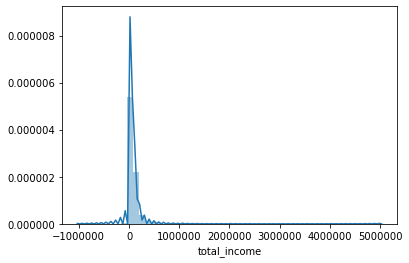

In [57]:
##测试集的总收入数据特征可视化
sns.distplot(y)

In [58]:
##测试集的总收入数据特征
y.describe()

count    8.000000e+03
mean     9.038790e+04
std      1.998266e+05
min     -1.000000e+06
25%      2.100000e+04
50%      5.422850e+04
75%      1.022000e+05
max      5.000000e+06
Name: total_income, dtype: float64

# 模型

In [59]:
import time
import lightgbm as lgb
from sklearn.feature_selection import RFECV
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [60]:
# lgbm属性值
param = {'num_leaves': 31,
         'min_data_in_leaf': 32, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.1,
         "min_child_samples": 20,
         "feature_fraction": 0.5,
         "bagging_freq": 1,
         "bagging_fraction": 0.7 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "nthread": 5,
         "verbosity": -1}

# set lighGBM parameters for repeatedKFord
rpparam = { 'num_leaves': 31,
            'boosting_type': 'rf',
            'min_data_in_leaf': 30, 
            'objective':'regression',
            'max_depth': -1,
            'learning_rate': 0.01,
            "min_child_samples": 20,
             "boosting": "gbdt",
             "feature_fraction": 0.9,
             "bagging_freq": 1,
             "bagging_fraction": 0.9 ,
             "bagging_seed": 11,
             "metric": 'rmse',
             "lambda_l1": 0.1,
             "verbosity": -1,
             "nthread": 4,
             "random_state": 4590}

In [61]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
            
clf.fit(train,target)
print(clf.score(train,target))
print(clf.score(test,y))

0.5916036446813022
0.5260375091045834


C:\Users\Joy\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.11215e-18): result may not be accurate.
  overwrite_a=True).T


In [65]:
# train with KFold 原始train
folds = KFold(n_splits=5, shuffle=True, random_state=15)
oof = np.zeros(len(train))
predictions = np.zeros(len(test))
start = time.time()
feature_importance_df = pd.DataFrame()
num_round = 100000

for fold_, (tr_idx, val_idx) in enumerate(folds.split(train.values, target.values)):
    print("#########################")
    print("fold n°{}".format(fold_))
    print("#########################")
    
    # transfer to lgb.dataset
    # lightgbm.Dataset(data, label=None, reference=None, weight=None, group=None, init_score=None,
    # silent=False, feature_name='auto', categorical_feature='auto', params=None, free_raw_data=True)
    tr_data = lgb.Dataset(train.iloc[tr_idx], label=target.iloc[tr_idx])
    val_data = lgb.Dataset(train.iloc[val_idx], label=target.iloc[val_idx])

    # train and predict
    clf = lgb.train(param, tr_data, num_round, valid_sets = [tr_data, val_data], verbose_eval=100, early_stopping_rounds = 200)
    oof[val_idx] = clf.predict(train.iloc[val_idx], num_iteration=clf.best_iteration)
    
    # process fold result
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = numerical_features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    predictions += clf.predict(test, num_iteration=clf.best_iteration) / folds.n_splits

# print final result
print("#########################")
print("CV score: {:<8.5f}".format(r2_score(oof, target)))

#########################
fold n°0
#########################
Training until validation scores don't improve for 200 rounds
[100]	training's rmse: 110040	valid_1's rmse: 141893
[200]	training's rmse: 92426.9	valid_1's rmse: 143994
Early stopping, best iteration is:
[98]	training's rmse: 110718	valid_1's rmse: 141716
#########################
fold n°1
#########################
Training until validation scores don't improve for 200 rounds
[100]	training's rmse: 108907	valid_1's rmse: 122342
[200]	training's rmse: 90116.2	valid_1's rmse: 122003
[300]	training's rmse: 78009	valid_1's rmse: 123376
Early stopping, best iteration is:
[156]	training's rmse: 97168.7	valid_1's rmse: 121239
#########################
fold n°2
#########################
Training until validation scores don't improve for 200 rounds
[100]	training's rmse: 102843	valid_1's rmse: 157511
[200]	training's rmse: 84705.1	valid_1's rmse: 159957
Early stopping, best iteration is:
[79]	training's rmse: 107567	valid_1's rmse: 15

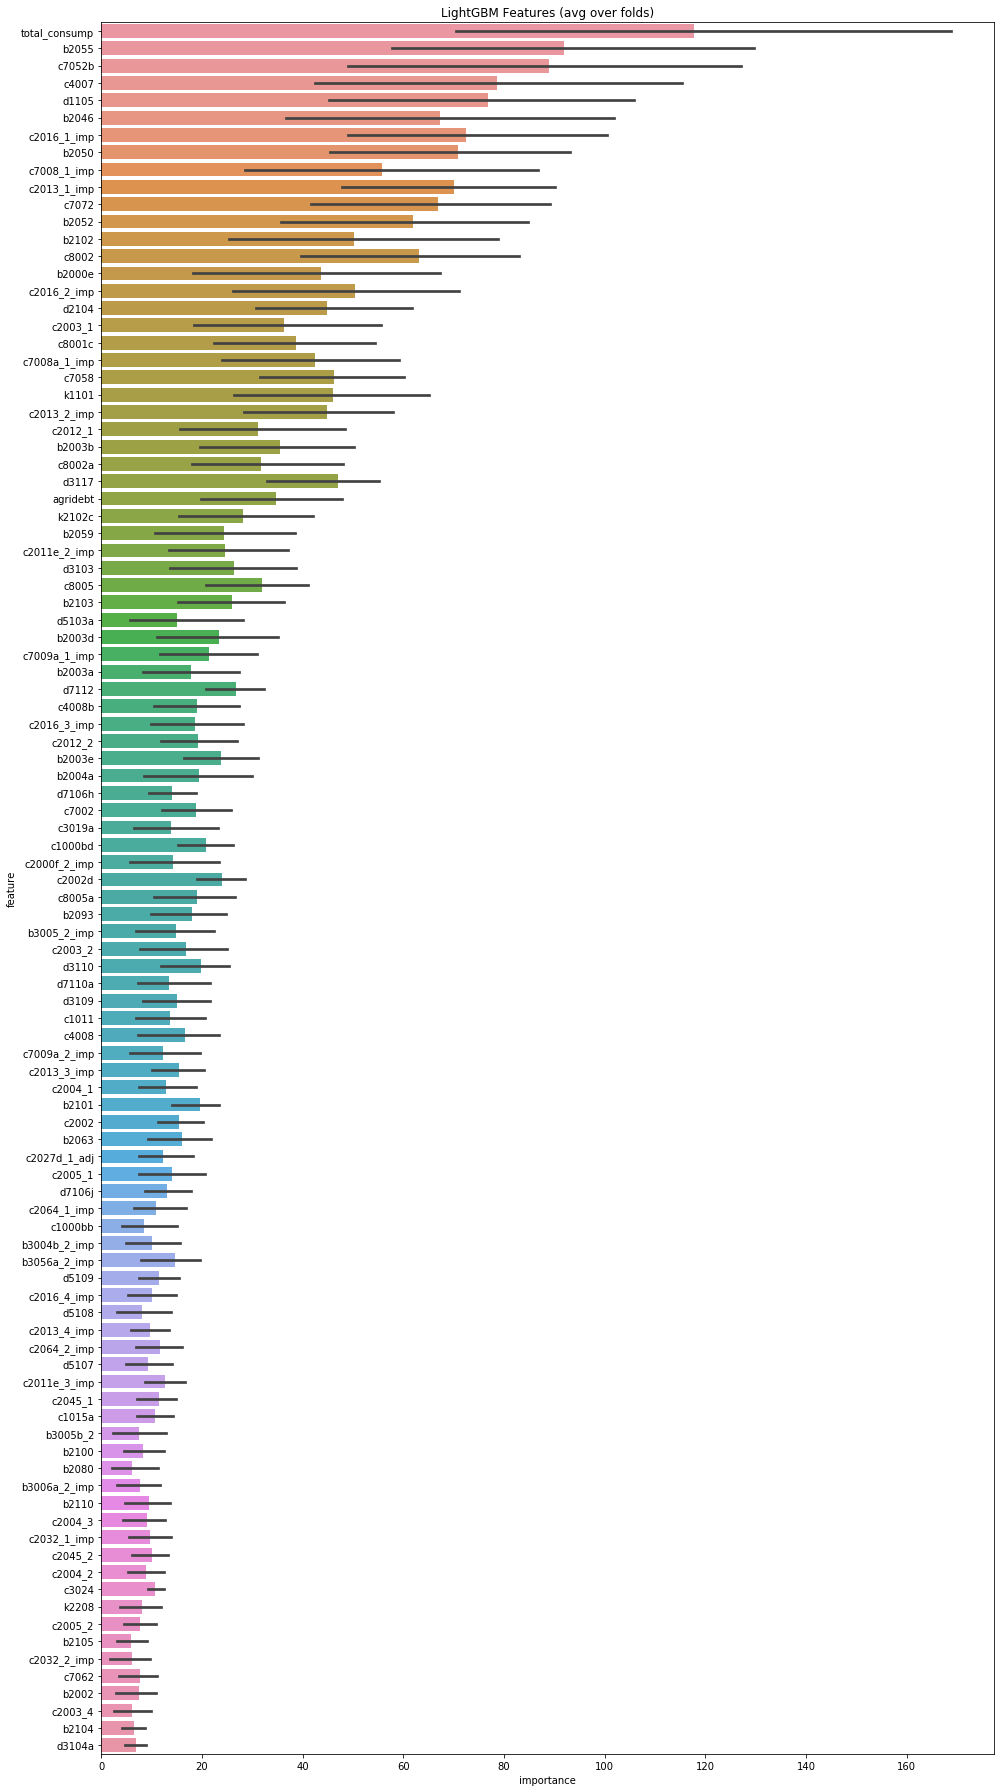

In [66]:
# look at feature importance 原始train特征
cols = (feature_importance_df[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:100].index)

best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,25))
sns.barplot(x="importance",
            y="feature",
            data=best_features.sort_values(by="importance",
                                           ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances_v1.png')

In [35]:
# train with KFold 用选出的train1
folds = KFold(n_splits=5, shuffle=True, random_state=15)
oof = np.zeros(len(train))
predictions = np.zeros(len(test1))
start = time.time()
feature_importance_df = pd.DataFrame()
num_round = 100000

for fold_, (tr_idx, val_idx) in enumerate(folds.split(train.values, target.values)):
    print("#########################")
    print("fold n°{}".format(fold_))
    print("#########################")
    
    # transfer to lgb.dataset
    # lightgbm.Dataset(data, label=None, reference=None, weight=None, group=None, init_score=None,
    # silent=False, feature_name='auto', categorical_feature='auto', params=None, free_raw_data=True)
    tr_data = lgb.Dataset(train1.iloc[tr_idx], label=target.iloc[tr_idx])
    val_data = lgb.Dataset(train1.iloc[val_idx], label=target.iloc[val_idx])

    # train and predict
    clf = lgb.train(param, tr_data, num_round, valid_sets = [tr_data, val_data], verbose_eval=100, early_stopping_rounds = 200)
    oof[val_idx] = clf.predict(train.iloc[val_idx], num_iteration=clf.best_iteration)
    
    # process fold result
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = f
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    predictions += clf.predict(test1, num_iteration=clf.best_iteration) / folds.n_splits

# print final result
print("#########################")
print("CV score: {:<8.5f}".format(mean_squared_error(oof, target)**0.5))

#########################
fold n°0
#########################
Training until validation scores don't improve for 200 rounds
[100]	training's rmse: 111695	valid_1's rmse: 135010
[200]	training's rmse: 96515.1	valid_1's rmse: 135166
Early stopping, best iteration is:
[98]	training's rmse: 112052	valid_1's rmse: 134893
#########################
fold n°1
#########################
Training until validation scores don't improve for 200 rounds
[100]	training's rmse: 111978	valid_1's rmse: 117985
[200]	training's rmse: 96022.4	valid_1's rmse: 119103
Early stopping, best iteration is:
[98]	training's rmse: 112505	valid_1's rmse: 117683
#########################
fold n°2
#########################
Training until validation scores don't improve for 200 rounds
[100]	training's rmse: 106356	valid_1's rmse: 153088
[200]	training's rmse: 91649.7	valid_1's rmse: 154141
Early stopping, best iteration is:
[56]	training's rmse: 115383	valid_1's rmse: 151332
#########################
fold n°3
##############

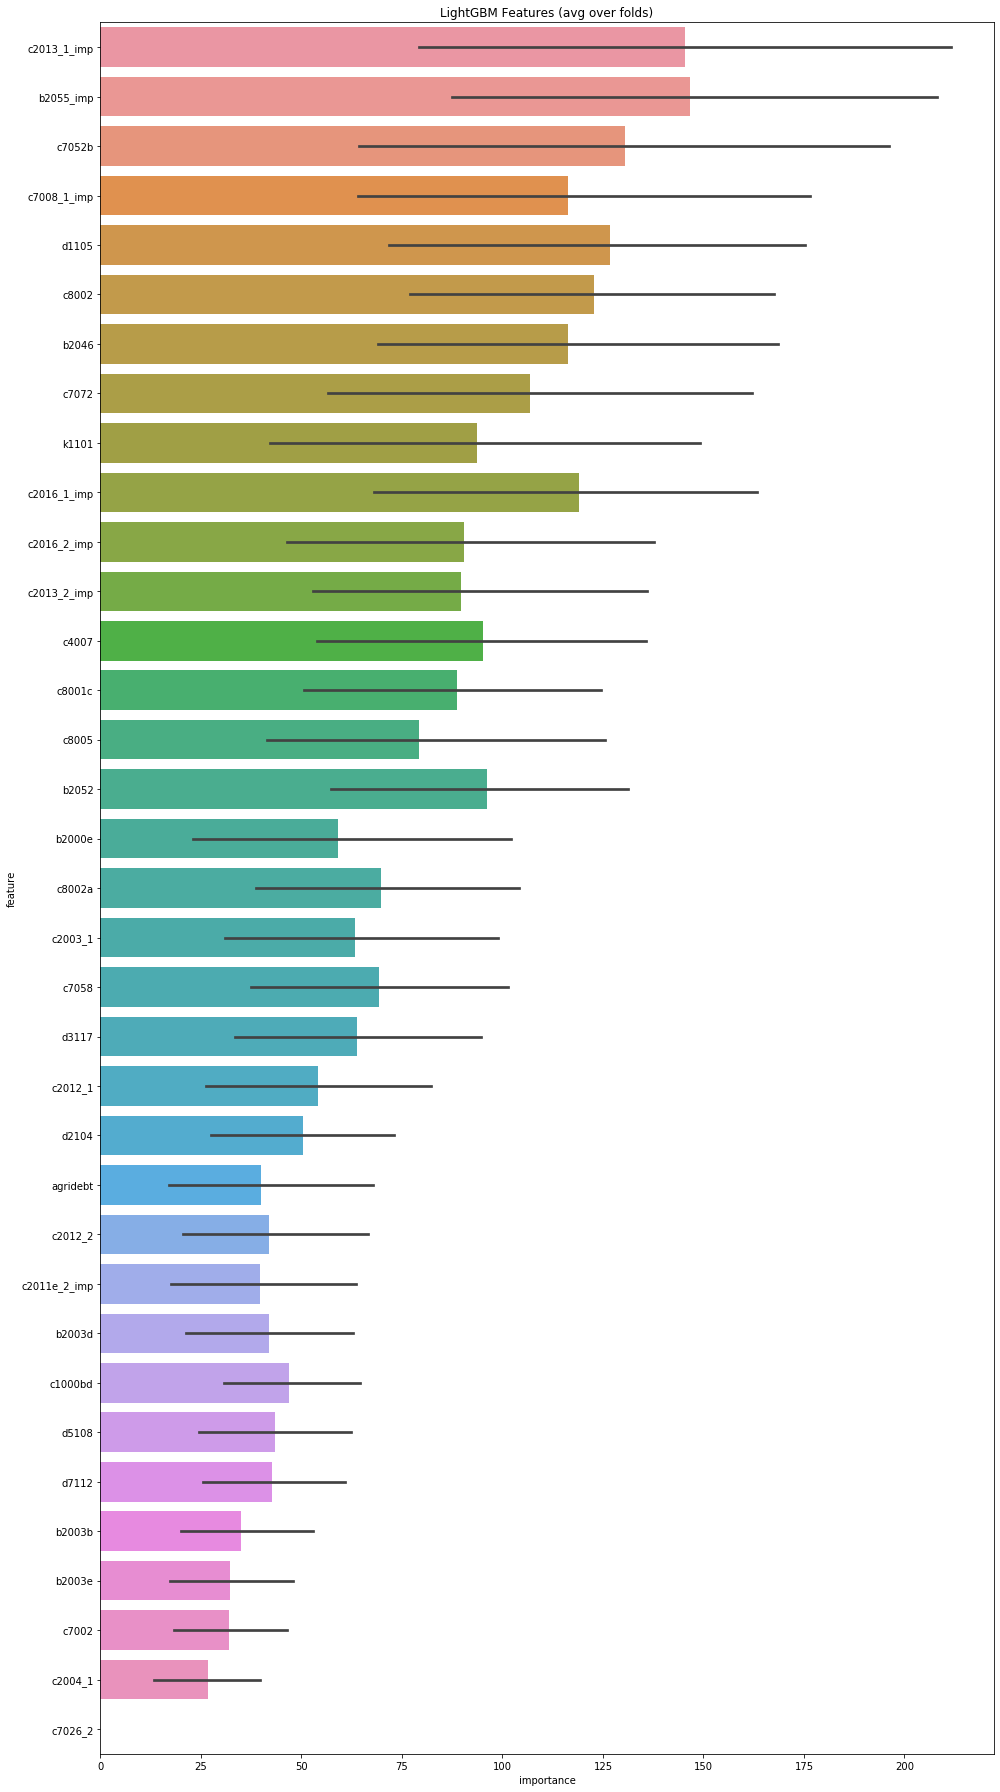

In [36]:
# look at feature importance 原始train特征
cols = (feature_importance_df[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:100].index)

best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,25))
sns.barplot(x="importance",
            y="feature",
            data=best_features.sort_values(by="importance",
                                           ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances_v1.png')

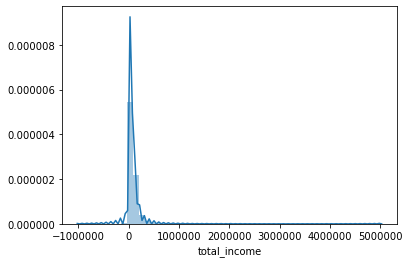

In [37]:
sns.distplot(target)

## LightGBM-2 with Repeated kfold approach

#### RepeatedKFold repeats K-Fold n times. It can be used when one requires to run KFold n times, producing different splits in each repetition.

In [38]:
folds = RepeatedKFold(n_splits=5, n_repeats=2, random_state=4520)

oof_lgb = np.zeros(len(train))
predictions_lgb = np.zeros(len(test))
start = time.time()
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target.values)):
    print("#########################")
    print("# fold n°{}".format(fold_))
    print("#########################")
    trn_data = lgb.Dataset(train.iloc[trn_idx], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train.iloc[val_idx], label=target.iloc[val_idx])

    num_round = 11000
    clf = lgb.train(rpparam, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=100, early_stopping_rounds = 100)
    oof_lgb[val_idx] = clf.predict(train.iloc[val_idx], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = numerical_features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions_lgb += clf.predict(test, num_iteration=clf.best_iteration) / (5 * 2)
    
print("####################")
print("CV score: {:<8.5f}".format(mean_squared_error(oof_lgb, target)**0.5))

#########################
# fold n°0
#########################
Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 142310	valid_1's rmse: 161642
[200]	training's rmse: 126328	valid_1's rmse: 146631
[300]	training's rmse: 118788	valid_1's rmse: 141408
[400]	training's rmse: 113915	valid_1's rmse: 139346
[500]	training's rmse: 110002	valid_1's rmse: 138550
[600]	training's rmse: 106584	valid_1's rmse: 138121
[700]	training's rmse: 103476	valid_1's rmse: 138016
[800]	training's rmse: 100687	valid_1's rmse: 137856
Early stopping, best iteration is:
[768]	training's rmse: 101581	valid_1's rmse: 137781
#########################
# fold n°1
#########################
Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 141085	valid_1's rmse: 166020
[200]	training's rmse: 125581	valid_1's rmse: 152743
[300]	training's rmse: 118167	valid_1's rmse: 148077
[400]	training's rmse: 113362	valid_1's rmse: 145672
[500]	training's rmse: 109